In [1]:
%load_ext autoreload
%autoreload 2
import importlib

from finetune_vs_scratch.hate import load_datasets as load_hate
from finetune_vs_scratch.sentiment import load_datasets as load_sentiment
from finetune_vs_scratch.emotion import load_datasets as load_emotion
from finetune_vs_scratch.irony import load_datasets as load_irony
from finetune_vs_scratch.model import load_tokenizer

tasks = {
    "hate": load_hate,
    "sentiment": load_sentiment,
    "emotion": load_emotion,
    "irony": load_irony,
}

beto_tokenizer = load_tokenizer("dccuchile/bert-base-spanish-wwm-uncased", 128)
roberta_tokenizer = load_tokenizer("BSC-TeMU/roberta-base-bne", 128)
robertuito_uncased_tokenizer = load_tokenizer("finiteautomata/robertuito-base-uncased", 128)
robertuito_deacc_tokenizer = load_tokenizer("finiteautomata/robertuito-base-deacc", 128)


In [14]:
import pandas as pd

df = pd.DataFrame()
for task, load_datasets in tasks.items():
    print(f"Task: {task}")
    splits = load_datasets()
    dataset = pd.concat([x.to_pandas() for x in splits])
    dataset["task"] = task.upper()
    df = pd.concat([df, dataset.loc[:, ["text", "task"]]])

Task: hate
Task: sentiment
Task: emotion
Task: irony


In [15]:
# Les resto 2 por los tokens iniciales y finales

args = {
    "truncation": True,
    "max_length": 128,
}
df["beto"] = [sum(x) - 2 for x in beto_tokenizer(list(df["text"].values), **args)["attention_mask"]]
df["robertuito-uncased"] = [sum(x) - 2 for x in robertuito_uncased_tokenizer(list(df["text"].values), **args)["attention_mask"]] 
df["robertuito-deacc"] = [sum(x) - 2 for x in robertuito_deacc_tokenizer(list(df["text"].values), **args)["attention_mask"]]
df["roberta"] = [sum(x) - 2 for x in roberta_tokenizer(list(df["text"].values), **args)["attention_mask"]]

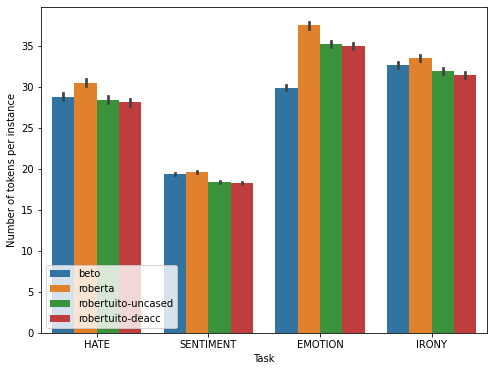

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

melted_df = df.melt(id_vars=["task"], value_vars=["beto", "roberta", "robertuito-uncased", "robertuito-deacc"], var_name="tokenizer", value_name="length")

plt.figure(figsize=(8, 6))

sns.barplot(x="task", y="length", hue="tokenizer", data=melted_df, ci=95)

plt.xlabel("Task")
plt.ylabel("Number of tokens per instance")
plt.legend(loc="lower left")
plt.savefig("img/length_tokens.pdf", bbox_inches="tight")